# **Calibration of the Energy Deposit vs Incident Energy**

In [125]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt

## Reading the files and the scoring tree

In [126]:
energy_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,5,10,20,40,50,60,70,80,100]


file_list=[]
for i in energy_list:
    file_list.append(ROOT.TFile(f"..//Outputs//Calibration//{i}GeV.root","READ"))  
    
    
tree_list=[]

for i in range(len(energy_list)):
    tree_list.append(file_list[i].Get("Scoring"))
    

## Creating the histograms and fitting the data with landau

In [127]:
hist_list=[]
mpv_list=[]
mpv_error_list=[]


for i in range(len(energy_list)):
    curr_hist = ROOT.TH1F(f"EnergyDeposit_{energy_list[i]}GeV",f"Incident Energy = {energy_list[i]}GeV",200,0,30)
    
    for events in tree_list[i]:
        float; edep = events.fEdep
        curr_hist.Fill(edep)   
    curr_hist.Fit("landau","Q0")
    mpv = curr_hist.GetFunction("landau").GetParameter(1)
    mpv_list.append(mpv)
    mpv_error = curr_hist.GetFunction("landau").GetParError(1)
    mpv_error_list.append(mpv_error)
    hist_list.append(curr_hist)

## Plotting the calibration curve

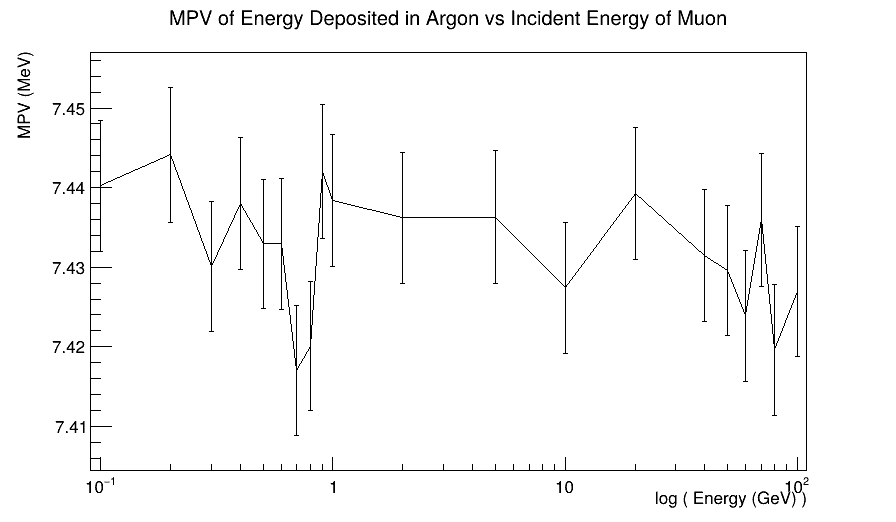

In [128]:
canvas = True
canvas = ROOT.TCanvas("canvas","canvas",900,550)
graph = ROOT.TGraphErrors(len(energy_list),np.array(energy_list),np.array(mpv_list),np.zeros(len(energy_list)),np.array(mpv_error_list))
graph.SetTitle("MPV of Energy Deposited in Argon vs Incident Energy of Muon")
graph.GetXaxis().SetTitle("log ( Energy (GeV) )")
graph.GetYaxis().SetTitle("MPV (MeV)")
graph.Draw("ALP")
canvas.SetLogx()
canvas.Draw()

## Saving the data as a ROOT file



In [129]:
cal_res = ROOT.TFile("calibration_results.root","RECREATE")
graph.Write()
cal_res.Close()